# Unsupervised Contrasitve Loss Demo

Issue #520

Dante Basile

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications.resnet50 import preprocess_input

from unsupcon_loss import (
    contrastive_loss,
    get_aug_seq,
    get_pairwise_sim,
    model_loss,
    sim,
)

## Use resnet50.preprocess_input
### Show Augmented Data

(100, 32, 32, 3)
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


2021-12-12 13:15:04.782100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 13:15:04.818025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 13:15:04.818231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 13:15:04.818857: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

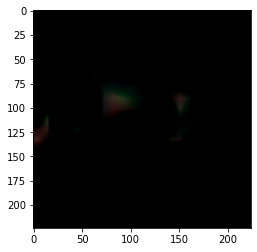

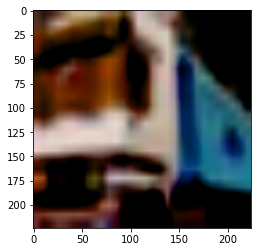

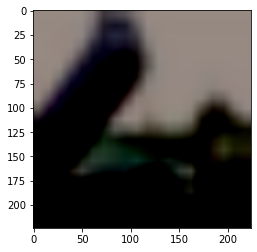

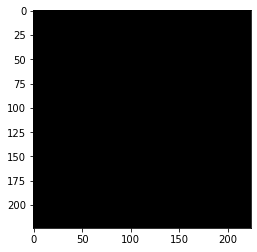

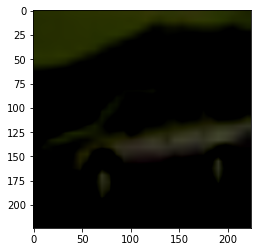

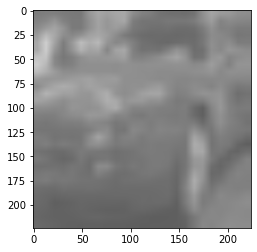

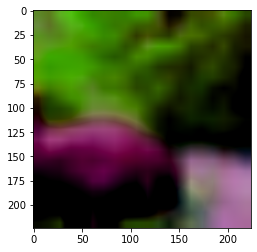

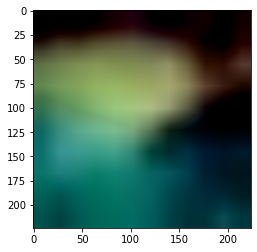

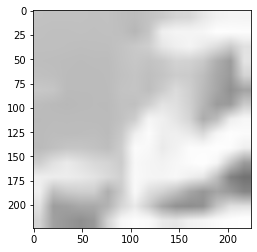

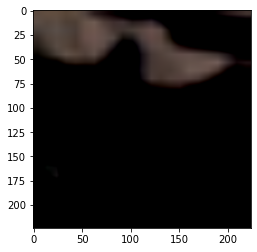

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X = X_train[:100]
X = preprocess_input(X)
X = tf.math.multiply(1.0 / 255, X)
print(np.shape(X))
N = 10
X_batches = tf.data.Dataset.from_tensor_slices(X).batch(N).take(1)
for batch in X_batches:
    aug_seq = get_aug_seq(np.size(X, 1), np.size(X, 2))
    batch = tf.map_fn(aug_seq, batch)
    for img in batch:
        plt.figure()
        plt.imshow(img)

### Demonstrate Loss Functions

In [3]:
for batch in X_batches:
    b_shape = tf.shape(batch)
    batch_l = tf.reshape(batch, (b_shape[0], b_shape[1] * b_shape[2], b_shape[3]))
    batch_z = tf.math.reduce_mean(
        batch_l, axis=2
    )  # this is a bad encoding for demo purposes only
    batch_z = tf.concat([batch_z, batch_z], 0)
    print(tf.shape(batch_z))
    s = get_pairwise_sim(batch_z, N)
    print(f"sim: {s}")
    print(f"sim shape: {s.shape}")
    cl = contrastive_loss(s, 0, 0, N)
    print(f"contrastive loss: {cl}")
    L = model_loss(batch_z, N)
    print(f"model loss L: {L}")

tf.Tensor([  20 1024], shape=(2,), dtype=int32)
sim: [[ 1.00000012e+00  6.44194484e-02 -4.01839435e-01  4.84464586e-01
   4.83069681e-02  9.80198383e-02 -6.81136772e-02 -1.20690420e-01
  -1.21997662e-01 -9.32031795e-02  1.00000012e+00  6.44194484e-02
  -4.01839435e-01  4.84464586e-01  4.83069681e-02  9.80198383e-02
  -6.81136772e-02 -1.20690420e-01 -1.21997662e-01 -9.32031795e-02]
 [ 6.44194484e-02  1.00000000e+00 -8.91178194e-03 -4.72242944e-02
   1.86651349e-01 -1.12601612e-02  2.27519006e-01 -1.57265496e-02
   1.41042009e-01 -1.46952376e-01  6.44194484e-02  1.00000000e+00
  -8.91178194e-03 -4.72242944e-02  1.86651349e-01 -1.12601612e-02
   2.27519006e-01 -1.57265496e-02  1.41042009e-01 -1.46952376e-01]
 [-4.01839435e-01 -8.91178194e-03  1.00000012e+00 -3.74087662e-01
   2.40125820e-01  1.49331868e-01  1.14729464e-01 -2.41538376e-01
   2.32156247e-01  2.63454974e-01 -4.01839435e-01 -8.91178194e-03
   1.00000012e+00 -3.74087662e-01  2.40125820e-01  1.49331868e-01
   1.14729464e-01 -2.

## Do not use resnet50.preprocess_input
### Show Augmented Data

(100, 32, 32, 3)


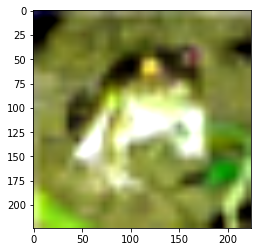

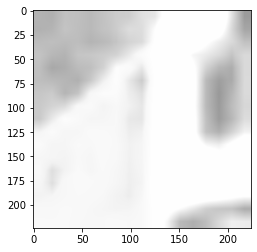

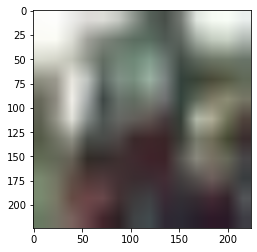

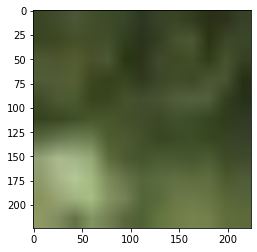

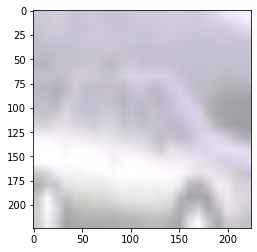

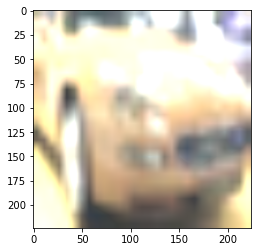

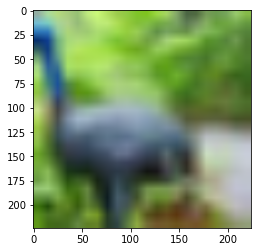

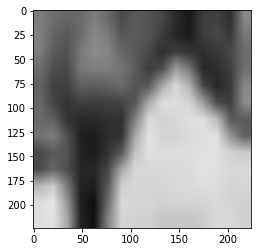

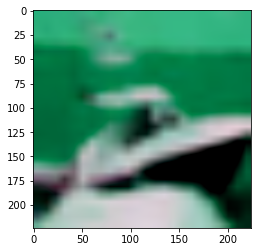

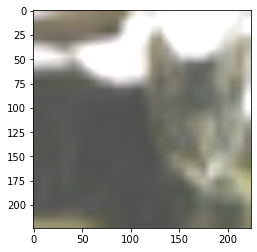

In [4]:
X = X_train[:100]
X = tf.math.multiply(1.0 / 255, X)
print(np.shape(X))
N = 10
X_batches = tf.data.Dataset.from_tensor_slices(X).batch(N).take(1)
for batch in X_batches:
    batch = tf.map_fn(aug_seq, batch)
    for img in batch:
        plt.figure()
        plt.imshow(img)

### Demonstrate Loss Functions

In [5]:
for batch in X_batches:
    b_shape = tf.shape(batch)
    batch_l = tf.reshape(batch, (b_shape[0], b_shape[1] * b_shape[2], b_shape[3]))
    batch_z = tf.math.reduce_mean(
        batch_l, axis=2
    )  # this is a bad encoding for demo purposes only
    batch_z = tf.concat([batch_z, batch_z], 0)
    print(tf.shape(batch_z))
    print(tf.shape(batch_z))
    s = get_pairwise_sim(batch_z, N)
    print(f"sim: {s}")
    print(f"sim shape: {s.shape}")
    cl = contrastive_loss(s, 0, 0, N)
    print(f"contrastive loss: {cl}")
    L = model_loss(batch_z, N)
    print(f"model loss L: {L}")

tf.Tensor([  20 1024], shape=(2,), dtype=int32)
tf.Tensor([  20 1024], shape=(2,), dtype=int32)
sim: [[1.         0.8707794  0.72607917 0.92626184 0.8129478  0.8374222
  0.88093984 0.83906555 0.89032537 0.6510596  1.         0.8707794
  0.72607917 0.92626184 0.8129478  0.8374222  0.88093984 0.83906555
  0.89032537 0.6510596 ]
 [0.8707794  0.9999999  0.76015204 0.88075596 0.8441278  0.84828204
  0.89051485 0.8232098  0.8619512  0.71471506 0.8707794  0.9999999
  0.76015204 0.88075596 0.8441278  0.84828204 0.89051485 0.8232098
  0.8619512  0.71471506]
 [0.72607917 0.76015204 0.99999994 0.73289716 0.81865394 0.8398766
  0.82302576 0.7184563  0.8288122  0.8371977  0.72607917 0.76015204
  0.99999994 0.73289716 0.81865394 0.8398766  0.82302576 0.7184563
  0.8288122  0.8371977 ]
 [0.92626184 0.88075596 0.73289716 0.9999999  0.8331569  0.8257782
  0.8722574  0.83548003 0.88991874 0.65458894 0.92626184 0.88075596
  0.73289716 0.9999999  0.8331569  0.8257782  0.8722574  0.83548003
  0.88991874 0.